\section*{Problem set 8}

\textbf{Laszlo Tetenyi}

\section*{Exercise 1}

\textbf{Proof:}

Suppose that $\mathcal{P}(S)$ is compact but $S$ is infinite. Take the following open cover of $\mathcal{P}(S)$, with representative element $U_s = \{  \phi : \phi(s) \in \mathbb{R}$  $\&$  $|\phi(s')| < \frac{1}{2} + \epsilon$ $\forall s' \neq s \}$, for some (fixed $\forall s$) $\epsilon < \frac{1}{2}$. Each $U_s$ is open as it is the Cartesian product of open sets. Moreover, they also cover $\mathcal{P}(S)$ as any distribution can only have one coordinate with a mass point over $\frac{1}{2}$. 

Now take the degenerate distributions in $\mathcal{P}(S)$, that is : $\phi \in \mathcal{P}(S): \exists !$ $s \in S$ st. $\phi(s) = 1$. There are infinitely many of these, by assumption, but each of them is included in different $U_s$ by construction. Therefore we are unable to select finitely many $U_s$ covering $\mathcal{P}(S)$ so $\mathcal{P}(S)$ is not compact. Contradiction, therefore $S$ must be finite.

\section*{Exercise 2}

\textbf{Proof:}

Suppose $\psi^* \in \mathcal{P}(\mathbb{Z})$ is a stationary distribution. $\forall y \in \mathbb{Z}$ by definition it must satisfy:

\begin{eqnarray*}
\psi^*(y) =& \sum_{x \in \mathbb{Z}} p(x,y) \psi^*(x) \\
=& \sum_{x \in \mathbb{Z}} \mathbf{1}(x=y-1) \psi^*(x) \\
=& \psi^*(y-1)
\end{eqnarray*}

But then $\psi^*(y) = \psi^*(y-1)$  $\forall y \in \mathbb{Z}$ implying that $\psi^*(y) = c >0$. However this also implies that $|\psi^*| = \infty$ or $0$ so $\psi^*$ is not a distribution.

\section*{Exercise 3}

The law of motion for $X_t$ can be written as:

\begin{equation*}
X_{t+1} = X_t - D_{t+1} + \mathbf{1}(X_t \leq q) \cdot (Q - X_t)
\end{equation*}

implying that:

\begin{eqnarray*}
p(x,y) =& \frac{1}{2}^{Q - y + 1}  \space \text{ if } \space y \leq Q  \space \text{ and } \space  x \leq q \\
 =& \frac{1}{2}^{x - y + 1}  \space \text{ if } \space y \leq x  \space \text{ and } \space  x > q \\
 =& \frac{1}{2}^{x - y + 1}  \space \text{ if } \space y \leq x  \space \text{ and } \space  x > q \\
 =& 0  \space \text{ otherwise }  
\end{eqnarray*}

Intuitively, we can never drift above $Q$, however, we can be extremely unlucky and our stock runs out - thus assumption that we only meet demand up to our stock is helpful (so there will be an additional mass sitting on 0). Therefore we have that $X_{t+1}$ takes finitely many values. Moreover, the probability of reaching any state is positive (as the shock is iid). Using the theorem from class we can conclude that it is globally stable. 

\section*{Exercise 4}

In [1]:
import quantecon as qe
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
q = 2
Q = 5

In [3]:
def gen_P(q,Q):
    P = np.empty((Q+1,Q+1))
    for y in range(Q+1):
            for x in range(Q+1):
                if x <=q:
                    P[x,y] = (1/2)**(Q-y+1)
                elif y <= x and x > q:
                    P[x,y] = (1/2)**(x-y+1)
                else:
                    P[x,y] = 0.0
    P[:,0] = P[:,0] + (1.0 - P.sum(1))
    return P

In [4]:
P = gen_P(q,Q)
mc = qe.MarkovChain(P)
mc.stationary_distributions

array([[ 0.0625,  0.0625,  0.125 ,  0.25  ,  0.25  ,  0.25  ]])

\section*{Exercise 5}

In [5]:
def stationary(P,tol = 1e-10):
    stat = np.ones((1,P.shape[0])) / P.shape[0]
    conv = 1.0
    while conv > tol:
        statnext = stat @ P
        conv = np.sum(np.absolute(statnext - stat))
        np.copyto(stat,statnext)
    return stat

In [6]:
stationary(P)

array([[ 0.0625,  0.0625,  0.125 ,  0.25  ,  0.25  ,  0.25  ]])

\section*{Exercise 6}

In [7]:
Q = 20
q_grid = [2,5,10,15]

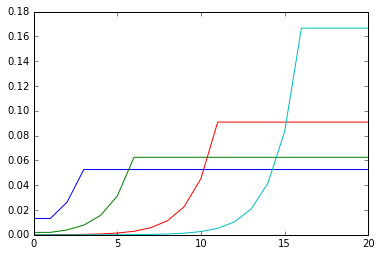

In [8]:
x_grid =np.reshape(np.arange(0,Q+1, 1,int),(1,21))
for q in q_grid:
    P = gen_P(q,Q)
    mc = qe.MarkovChain(P)    
    plt.plot(x_grid.T,mc.stationary_distributions.T)
plt.show()

Interpretation: As q increases, less and less mass is sitting below q thanks to the dividend process.